# Простые визуализации

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify

from wordcloud import WordCloud
import numpy as np
import os
from PIL import Image    # to import the image
import re
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

%matplotlib inline

# ВВП и нефть

In [2]:
df = pd.read_excel('gpd2.xlsx')
brent = pd.read_csv('brent.csv')

In [3]:
df.set_index(df.country, inplace=True)

In [4]:
df.drop('country', axis=1, inplace=True)

In [5]:
df = df.T

In [6]:
df['price'] = list(brent['price'])

In [7]:
annot_price = list(brent['price'])

In [8]:
annot = ['brent - {} $'.format(str(i)) for i in annot_price]

In [9]:
annot

['brent - 28.66 $',
 'brent - 24.46 $',
 'brent - 24.99 $',
 'brent - 28.85 $',
 'brent - 38.26 $',
 'brent - 54.57 $',
 'brent - 65.16 $',
 'brent - 72.44 $',
 'brent - 96.94 $',
 'brent - 61.74 $',
 'brent - 79.61 $',
 'brent - 111.26 $',
 'brent - 111.63 $',
 'brent - 108.56 $',
 'brent - 98.97 $',
 'brent - 52.32 $',
 'brent - 43.64 $',
 'brent - 54.13 $',
 'brent - 71.34 $',
 'brent - 64.3 $']

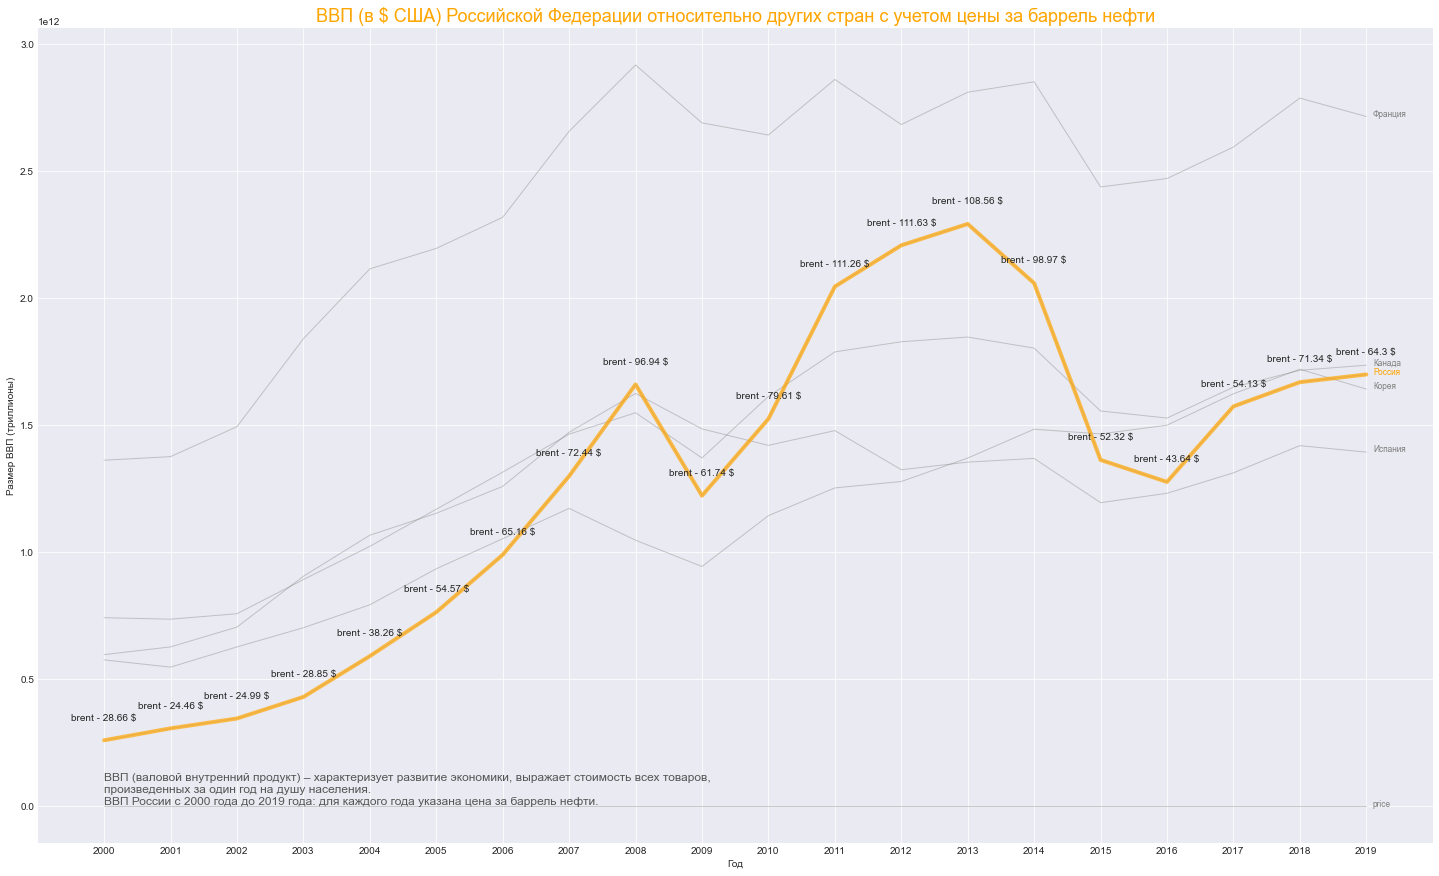

In [10]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
#my_dpi=96
#plt.figure(figsize=(1024/my_dpi, 1024/my_dpi), dpi=my_dpi)
ax = plt.figure(figsize=(25, 15))

# multiple line plot
for column in df:
    _ = plt.plot(df.index, df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
_ = plt.plot(df.index, df['Россия'], marker='', color='orange', linewidth=4, alpha=0.7)
#_ = plt.plot(brent.index, marker='', color='royalblue', linewidth=4, alpha=0.7)
 
# Change xlim
plt.xlim(-1, 20)
 
# Let's annotate the plot
num=0
for i in df.values[19][1:]:
    num+=1
    name=list(df)[num]
    if name != 'Россия':
        _ = plt.text(19.1, i, name, horizontalalignment='left', size='small', color='grey')
 
_ = plt.text(19.1, df['Россия'].tail(1), 'Россия', horizontalalignment='left', size='small', color='orange')

for i, txt in enumerate(annot):
    plt.annotate(txt, (df.index[i], df['Россия'][i]), ha='center', xytext=(0, 20), textcoords='offset points')
#ax.annotate(annot, (df.index, df['Россия']))

# Add titles
_ = plt.title("ВВП (в $ США) Российской Федерации относительно других стран с учетом цены за баррель нефти", loc='center', fontsize=18, fontweight=0, color='orange')
_ = plt.xlabel("Год")
_ = plt.ylabel("Размер ВВП (триллионы)")
_ = plt.text( 0, 58,'ВВП (валовой внутренний продукт) – характеризует развитие экономики, выражает стоимость всех товаров, \nпроизведенных за один год на душу населения. \nВВП России с 2000 года до 2019 года: для каждого года указана цена за баррель нефти.', ha='left', va='bottom', size=12, color='#555555' )

In [11]:
annot_price_multiplied = [i*10**10 for i in annot_price]

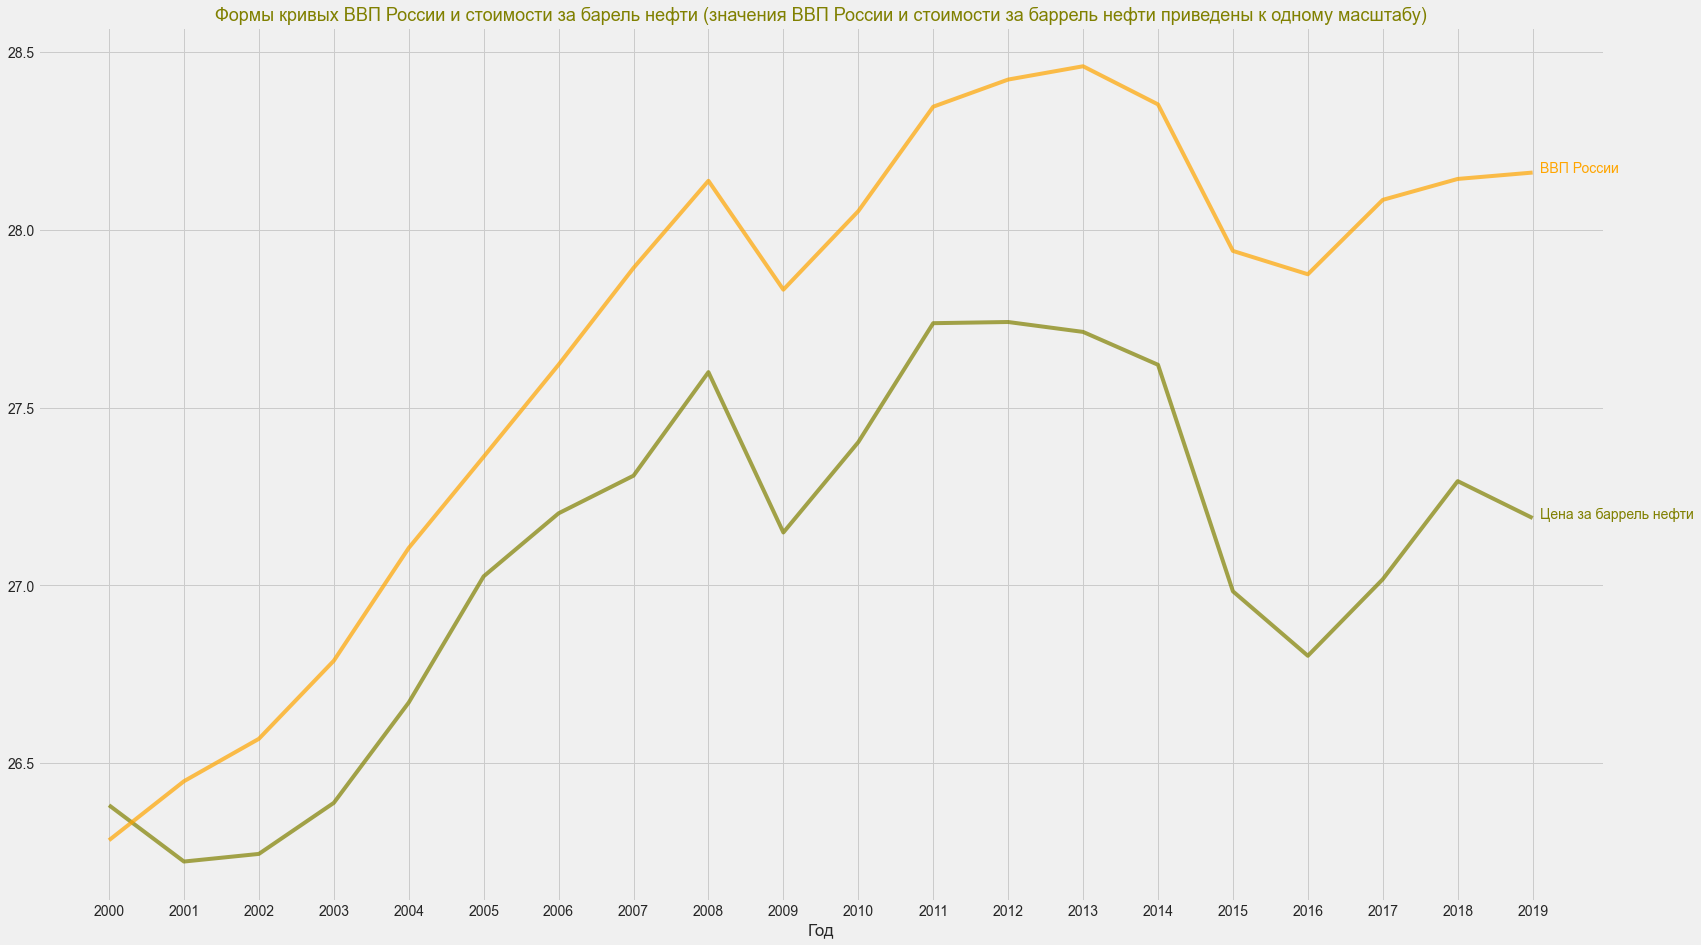

In [12]:
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-darkgrid')
#my_dpi=96
#plt.figure(figsize=(1024/my_dpi, 1024/my_dpi), dpi=my_dpi)
ax = plt.figure(figsize=(25, 15))

_ = plt.plot(pd.Series(np.log(annot_price_multiplied)), marker='', color='olive', linewidth=4, alpha=0.7, label='Цена за баррель нефти')
_ = plt.text(19.1, pd.Series(np.log(annot_price_multiplied)).tail(1), 'Цена за баррель нефти', horizontalalignment='left', size='medium', color='olive')
_ = plt.plot(pd.Series(np.log(df['Россия'])), marker='', color='orange', linewidth=4, alpha=0.7, label='ВВП России')
_ = plt.text(19.1, pd.Series(np.log(df['Россия'])).tail(1), 'ВВП России', horizontalalignment='left', size='medium', color='orange')

_ = plt.title("Формы кривых ВВП России и стоимости за барель нефти (значения ВВП России и стоимости за баррель нефти приведены к одному масштабу)", loc='center', fontsize=18, fontweight=0, color='olive')
_ = plt.xlabel("Год")

# Сравнение ВВП

In [13]:
gpd_full = pd.read_excel('gpd_full.xlsx')

In [14]:
countries = gpd_full.sort_values(by='2019', ascending=False).head(12)

In [15]:
countries

,Country Name,2019
168,США,2.142770e+13
30,Китай,1.434290e+13
81,Япония,5.081770e+12
41,Германия,3.845630e+12
73,Индия,2.875142e+12
56,Великобритания,2.827113e+12
54,Франция,2.715518e+12
78,Италия,2.001244e+12
23,Бразилия,1.839758e+12
27,Канада,1.736426e+12


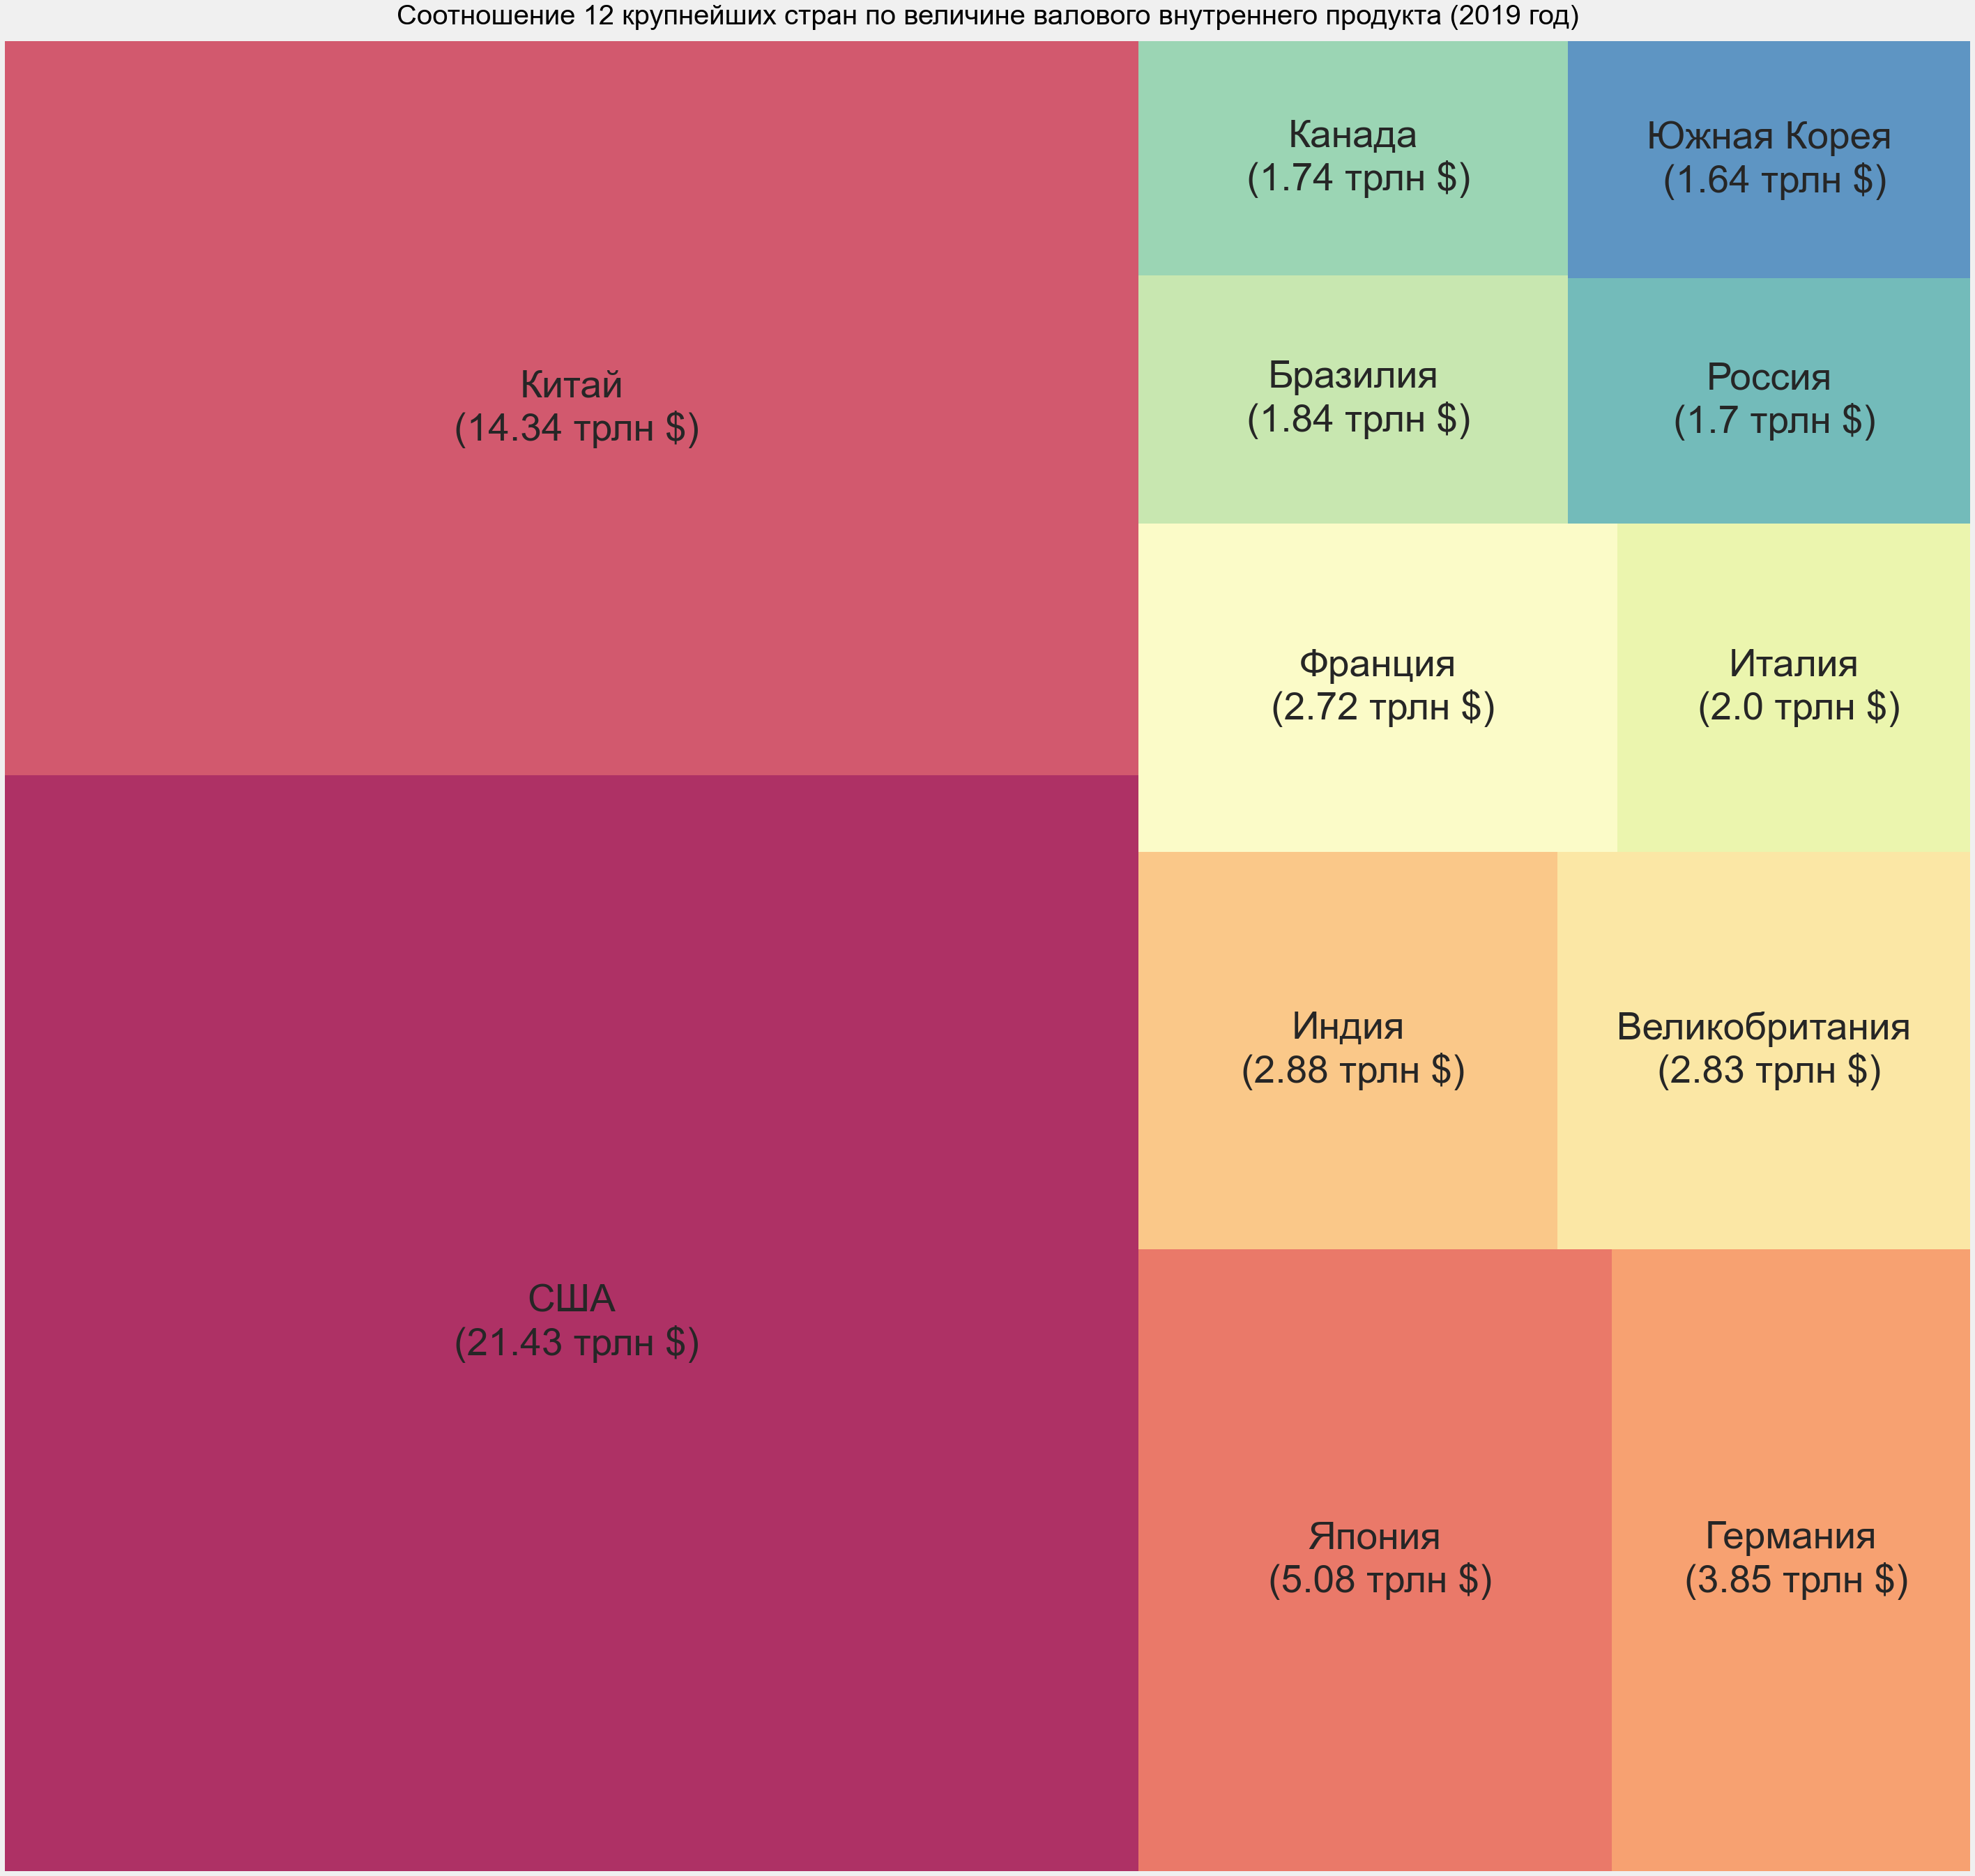

In [16]:
ax = plt.figure(figsize=(45, 45))

labels = countries.apply(lambda x: str(x[0]) + "\n (" + str(round((x[1]/10**12), 2)) + " трлн $)", axis=1)

colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

squarify.plot(sizes=countries['2019'], label=labels, alpha=.8, color=colors, text_kwargs = {'size': 55})

plt.axis('off')
_ = plt.title("Соотношение 12 крупнейших стран по величине валового внутреннего продукта (2019 год)", loc='center', fontsize=40, fontweight=5, color='black', pad=25)
plt.show()

# Облако слов - Анна Каренина

In [17]:
file = open('anna.txt', 'r', encoding='utf-8')
text = file.read()

In [18]:
def clear_text(corpus):
    """
    Clear purpose
    """
    corpus = text.split(' ')
    pure_text = [re.sub(r'[^а-яА-Я]',' ', text) for text in corpus]
    #lowered = [[word.lower() for word in s] for s in pure_text]
    stem_text = [''.join(word).lower() for word in pure_text if len(word) > 3]
    return stem_text

In [19]:
pure_text = clear_text(text)

In [20]:
text_double = pure_text.copy()

In [21]:
some = pd.DataFrame(text_double, columns=['word'])

In [22]:
def name_fixer(row):
    name = row['word']

    if (' ' in name and len(name) < 3):
        return None
    elif 'вронск' in name:
        return 'вронский'
    elif 'левин' in name:
        return 'левин'
    elif 'него' in name or 'потому что' in name or 'чтоб' in name or 'потому' in name or 'которых' in name or 'чего' in name or 'чтобы' in name or ('была' in name and len(name) < 4) or ('были' in name and len(name) < 4) or ('был' in name and len(name) < 4) or ('как' in name and len(name) < 4) or ('все' in name and len(name) < 4) or ('ей' in name and len(name) < 4) or 'было' in name or 'что то' in name or 'что он' in name or 'что она' in name or 'то что' in name or ('уже' in name and len(name) < 3) or 'сказал' in name:
        return None
    elif 'была' in name or ('пред' in name and len(name) < 5):
        return None
    elif 'говорил' in name:
        return None
    elif 'люб' in name:
        return 'любовь'
    elif 'семь' in name:
        return 'семья'
    elif 'облонск' in name:
        return 'облонский'
    elif ('алексе' in name and 'александров' in name):
        return 'алексей александрович'
    elif ('муж' in name and len(name) <= 4):
        return 'муж'
    elif 'нему' in name or 'меня' in name or ('были' in name and len(name) <= 4):
        return None
    else:
        return name

In [23]:
some['fixed'] = some.apply(name_fixer, axis=1)

In [24]:
some.head(15)

,word,fixed
0,счастливые,счастливые
1,семьи,семья
2,похожи,похожи
3,друг,друг
4,друга,друга
5,каждая,каждая
6,несчастливая,несчастливая
7,семья,семья
8,несчастлива,несчастлива
9,по своему,по своему


In [25]:
some.dropna(inplace=True)

In [26]:
fin = some.drop('word', axis=1)

In [27]:
text = ' '.join(list(fin.fixed))

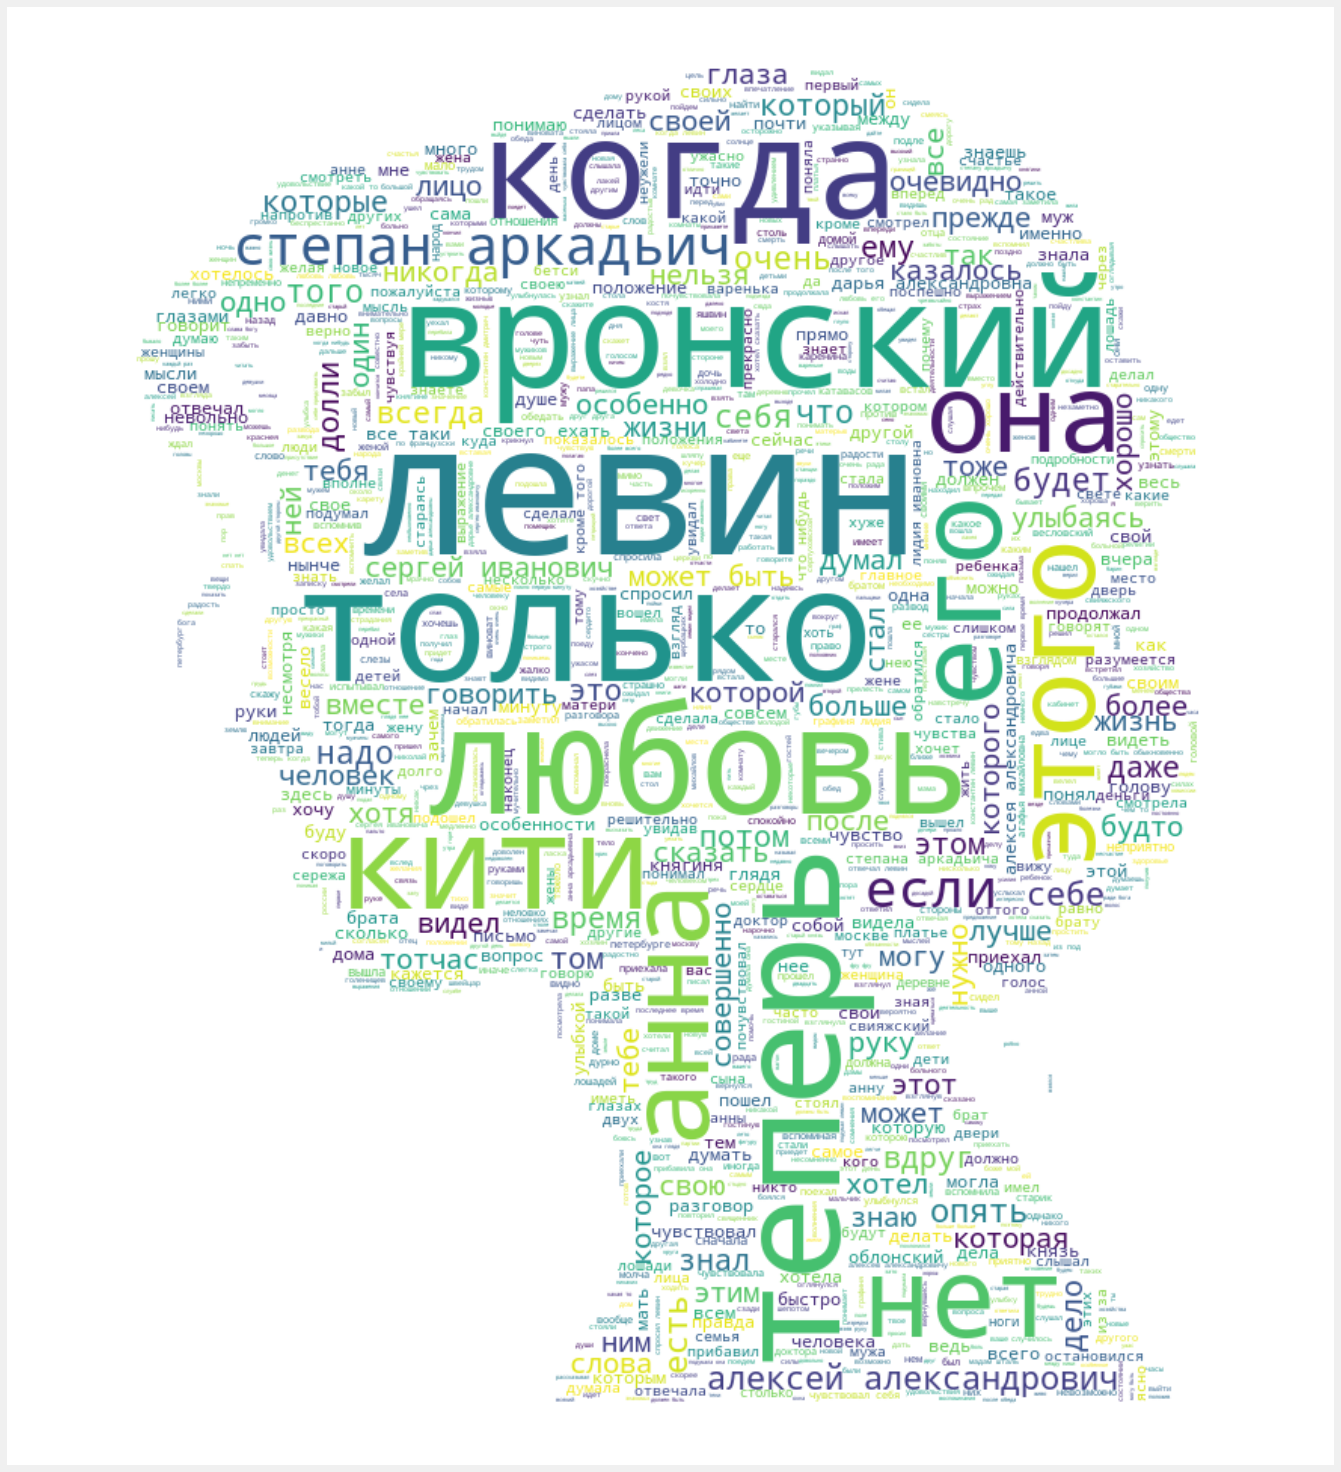

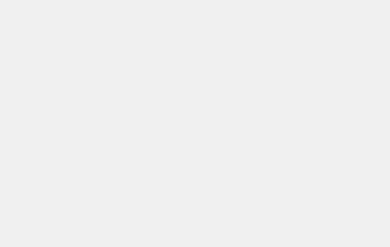

<Figure size 432x288 with 0 Axes>

In [28]:
wave_mask = np.array(Image.open("sil.jpg"))

wordcloud = WordCloud(mask=wave_mask, background_color="white", max_words=280312).generate(text)
plt.figure(figsize=(25, 25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()
plt.savefig('anna.jpg')